# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [31]:
%pip install citipy
%matplotlib inline


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Wayne He\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

import datetime

### Generate the Cities List by Using the `citipy` Library

In [33]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [34]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
city_url = f"{url}appid={weather_api_key}&units={units}&q="
for i, city in enumerate(cities):
    city_weather = requests.get(city_url + city.replace(" ","+")).json()
print(city_weather)

{'coord': {'lon': -9.7026, 'lat': 52.2704}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 10.18, 'feels_like': 9.45, 'temp_min': 10.18, 'temp_max': 10.18, 'pressure': 1018, 'humidity': 84, 'sea_level': 1018, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.21, 'deg': 318, 'gust': 6.02}, 'clouds': {'all': 95}, 'dt': 1725859650, 'sys': {'country': 'IE', 'sunrise': 1725861840, 'sunset': 1725908905}, 'timezone': 3600, 'id': 2961123, 'name': 'Tralee', 'cod': 200}


In [35]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kruisfontein
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | qaqortoq
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | colonia
Processing Record 8 of Set 1 | marquette
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | st. john's
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | brooks
Processing Record 13 of Set 1 | luau
Processing Record 14 of Set 1 | selfoss
Processing Record 15 of Set 1 | taytay
Processing Record 16 of Set 1 | port lincoln
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | una
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 1 | laoj

In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [37]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kruisfontein,-34.0033,24.7314,9.57,72,88,0.38,ZA,1725859608
1,port-aux-francais,-49.3500,70.2167,3.32,80,35,10.61,TF,1725859593
2,qaqortoq,60.7167,-46.0333,5.22,63,100,2.85,GL,1725859608
3,adamstown,-25.0660,-130.1015,19.18,84,99,13.39,PN,1725859608
4,iqaluit,63.7506,-68.5145,3.85,64,0,4.63,CA,1725859608


In [38]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [39]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kruisfontein,-34.0033,24.7314,9.57,72,88,0.38,ZA,1725859608
1,port-aux-francais,-49.3500,70.2167,3.32,80,35,10.61,TF,1725859593
2,qaqortoq,60.7167,-46.0333,5.22,63,100,2.85,GL,1725859608
3,adamstown,-25.0660,-130.1015,19.18,84,99,13.39,PN,1725859608
4,iqaluit,63.7506,-68.5145,3.85,64,0,4.63,CA,1725859608


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

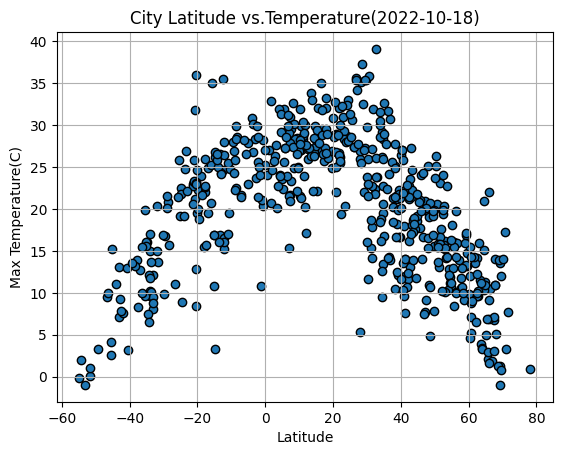

In [40]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Latitude vs.Temperature(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

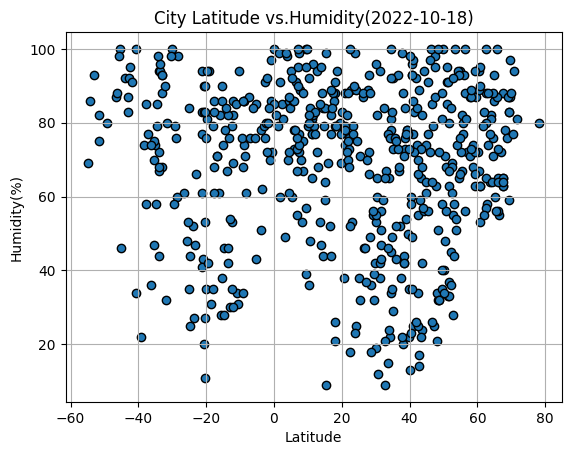

In [41]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs.Humidity(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

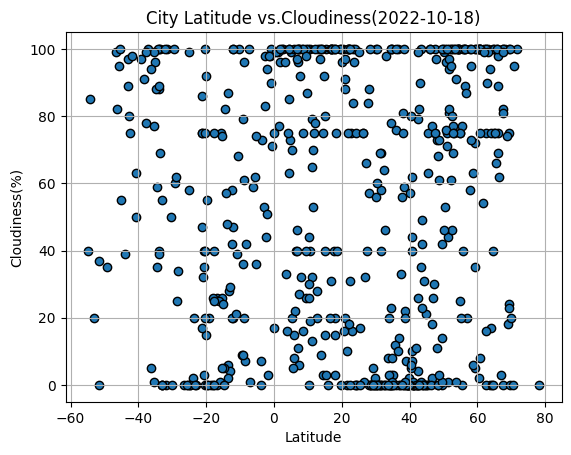

In [42]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs.Cloudiness(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

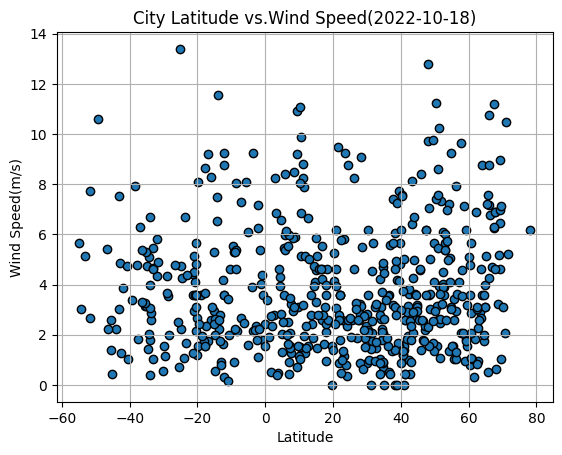

In [43]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Latitude vs.Wind Speed(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = st.pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
       
    #Plot the line
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(correlation[0],2)}")

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,qaqortoq,60.7167,-46.0333,5.22,63,100,2.85,GL,1725859608
4,iqaluit,63.7506,-68.5145,3.85,64,0,4.63,CA,1725859608
5,colonia,50.9333,6.9500,15.54,91,75,2.57,DE,1725859609
6,marquette,46.5333,-87.6335,16.61,85,2,1.79,US,1725859609
8,st. john's,47.5649,-52.7093,20.64,98,75,6.17,CA,1725859651


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kruisfontein,-34.0033,24.7314,9.57,72,88,0.38,ZA,1725859608
1,port-aux-francais,-49.3500,70.2167,3.32,80,35,10.61,TF,1725859593
3,adamstown,-25.0660,-130.1015,19.18,84,99,13.39,PN,1725859608
7,grytviken,-54.2811,-36.5092,1.93,86,85,3.02,GS,1725859609
9,ushuaia,-54.8000,-68.3000,-0.19,69,40,5.66,AR,1725859609


###  Temperature vs. Latitude Linear Regression Plot

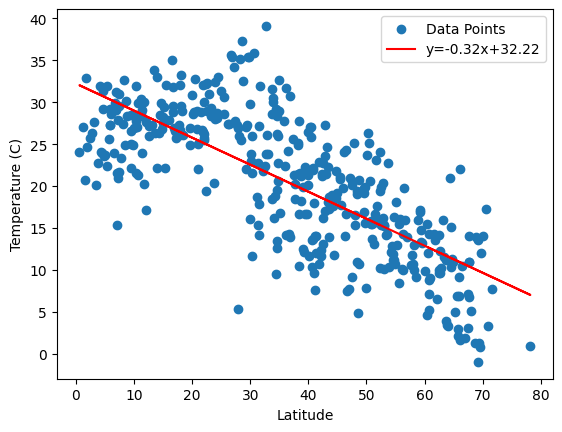

<Figure size 640x480 with 0 Axes>

In [47]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Create regression line values
regression_line = slope * northern_hemi_df['Lat'] + intercept

# Plot data points and regression line
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], label="Data Points")
plt.plot(northern_hemi_df['Lat'], regression_line, color='red', label=f"y={slope:.2f}x+{intercept:.2f}")

# Label the axes
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.legend()

# Show the plot
plt.show()
plt.savefig("output_data/Fig5.png")

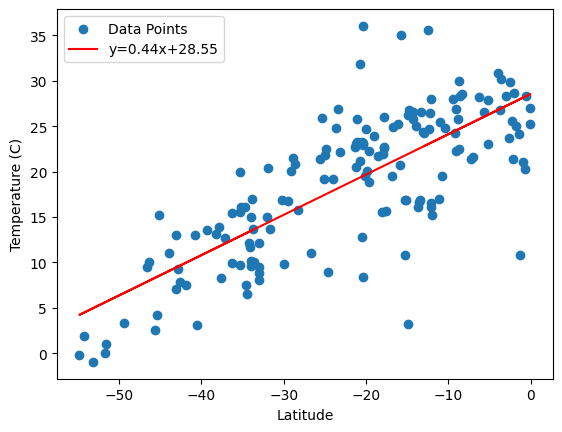

In [48]:

# Perform linear regression on Southern Hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Create regression line values
regression_line = slope * southern_hemi_df['Lat'] + intercept

# Plot data points and regression line
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], label="Data Points")
plt.plot(southern_hemi_df['Lat'], regression_line, color='red', label=f"y={slope:.2f}x+{intercept:.2f}")

# Label the axes
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.legend()

plt.savefig("output_data/Fig6.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

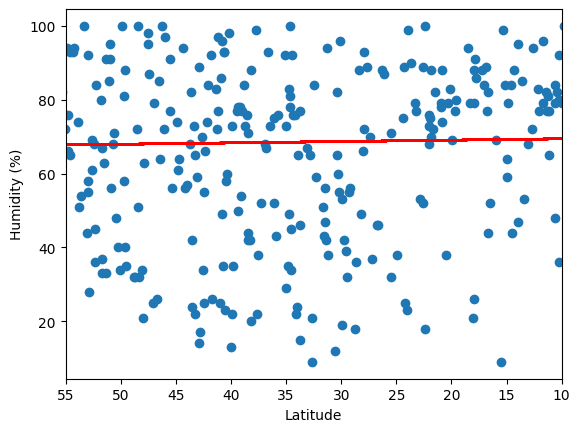

In [49]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Create regression line values
regression_line = slope * northern_hemi_df['Lat'] + intercept

# Plot data points and regression line
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], label="Data Points")
plt.plot(northern_hemi_df['Lat'], regression_line, color='red', label=f"y={slope:.2f}x+{intercept:.2f}")

# Set axis limits if needed (from 55 to 10 as mentioned in the original code)
plt.xlim(55, 10)

# Label the axes
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig("output_data/Fig7.png")

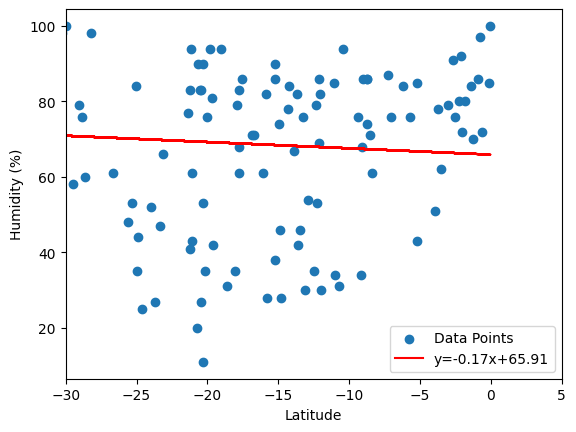

<Figure size 640x480 with 0 Axes>

In [50]:
# Southern Hemisphere

slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Create regression line values
regression_line = slope * southern_hemi_df['Lat'] + intercept

# Plot data points and regression line
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], label="Data Points")
plt.plot(southern_hemi_df['Lat'], regression_line, color='red', label=f"y={slope:.2f}x+{intercept:.2f}")

# Set axis limits if needed (from -30 to 5, for example)
plt.xlim(-30, 5)

# Label the axes
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Add legend
plt.legend()

# Show the plot
plt.show()

plt.savefig("output_data/Fig8.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

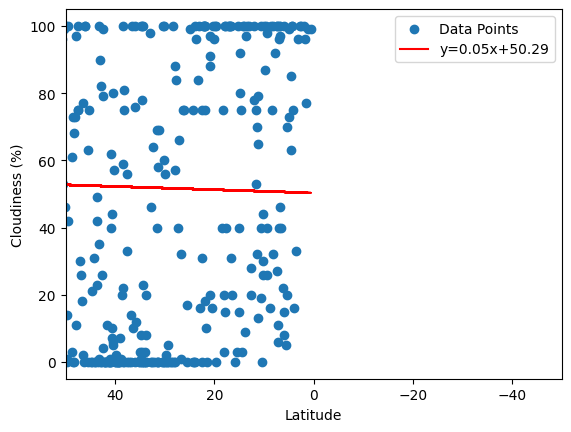

<Figure size 640x480 with 0 Axes>

In [51]:
# Northern Hemisphere
# Perform linear regression on Northern Hemisphere data (Latitude vs Cloudiness)
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Create regression line values
regression_line = slope * northern_hemi_df['Lat'] + intercept

# Plot data points and regression line
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], label="Data Points")
plt.plot(northern_hemi_df['Lat'], regression_line, color='red', label=f"y={slope:.2f}x+{intercept:.2f}")

# Adjust axis limits if necessary
plt.xlim(50, -50)  # Adjust this range based on your needs

# Label the axes
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Add a legend
plt.legend()

# Show the plot
plt.show()
plt.savefig("output_data/Fig9.png")

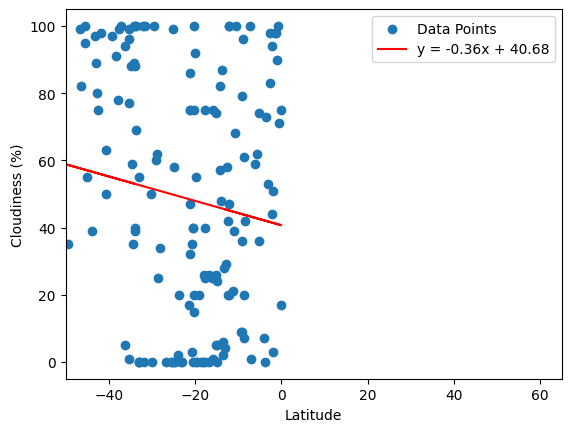

<Figure size 640x480 with 0 Axes>

In [52]:
# Southern Hemisphere
# Perform linear regression on Southern Hemisphere data (Latitude vs Cloudiness)
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Create regression line values
regression_line = slope * southern_hemi_df['Lat'] + intercept

# Plot data points
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], label='Data Points')

# Plot regression line
plt.plot(southern_hemi_df['Lat'], regression_line, color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')

# Set axis limits based on your input (-50, 65)
plt.xlim(-50, 65)

# Label the axes
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Add a legend
plt.legend()

# Show the plot
plt.show()
plt.savefig("output_data/Fig10.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

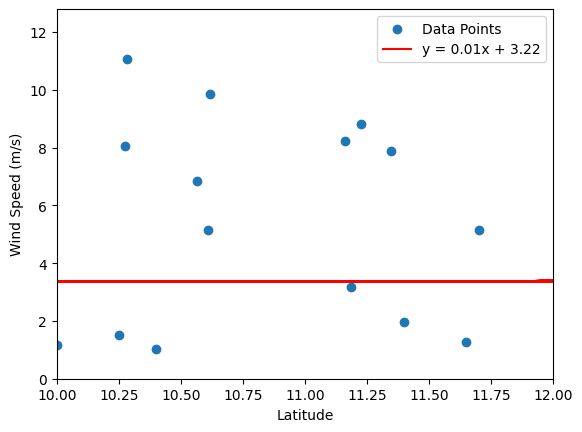

In [53]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Create regression line values
regression_line = slope * northern_hemi_df['Lat'] + intercept

# Plot data points and regression line
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], label="Data Points")
plt.plot(northern_hemi_df['Lat'], regression_line, color='red', label=f"y = {slope:.2f}x + {intercept:.2f}")

# Set axis limits as specified (10 to 12)
plt.xlim(10, 12)  # Be sure this makes sense for your data range
plt.ylim(min(northern_hemi_df['Wind Speed']), max(northern_hemi_df['Wind Speed']))  # Adjust y-limits if needed

# Label the axes
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Add a legend
plt.legend()
plt.savefig("output_data/Fig11.png")

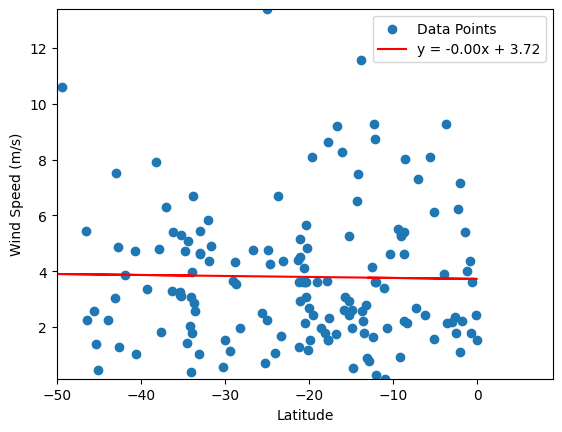

<Figure size 640x480 with 0 Axes>

In [54]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Create regression line values
regression_line = slope * southern_hemi_df['Lat'] + intercept

# Plot data points and regression line
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], label="Data Points")
plt.plot(southern_hemi_df['Lat'], regression_line, color='red', label=f"y = {slope:.2f}x + {intercept:.2f}")

# Set axis limits as specified (-50, 9)
plt.xlim(-50, 9)  # Adjust this range based on your data, if needed
plt.ylim(min(southern_hemi_df['Wind Speed']), max(southern_hemi_df['Wind Speed']))  # Automatically set y-axis limits

# Label the axes
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Add a legend
plt.legend()

# Show the plot
plt.show()
plt.savefig("output_data/Fig12.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [55]:
#In northern hemisphere, a city's latitude and wind speed have no coorelation(0.00) - that is to say a city's windy level does not much related to its latitude, in southern hemisphere, it is a similar situation with very minor negative coorelation(-0.17) between city's latitude and wind speed.